# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib notebook

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [18, 36, 299]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18601,6327,10099,2205,2767,3181
1,29955,4362,5428,1729,862,4626
2,444,879,2060,264,290,259


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The first sample has a spending in fresh and deli products that are above the 75th percentile while all the other features belong to the third quartile. Since the spending is consistenly high for all features I think this might be a large grocery store. 

The second sample has a very large spending (within two std and above the 75th percentile) in both fresh and deli products and alike the first one all the other features belong to the third quartile. Differently from the first sample, however, fresh products are placed within two std from the mean while cleaning supplies are only slighly higher than the 50th percentile limit. I think these characteristics are more compatible with that of a restaurant that needs a lot of fresh products and use detergents to clean and not for selling. 

The last one does not spend much in any of the category apart for groceries. I imagine this could be the a common pattern for very small markets, maybe those that you can find in gas stations.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

rept = 100
for feat in data.columns:

    sum_score = 0
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feat, axis=1) 
    labels = data[feat]

    # TODO: Split the data into training and testing sets using the given feature as the target
    # TODO: Create a decision tree regressor and fit it to the training set
    
    for i in range(rept):
        X_train, X_test, y_train, y_test = train_test_split(new_data, labels)
        regressor = DecisionTreeRegressor()

        parameters = {'max_depth': (5, 8, 10, 15, 20, 30), 'min_samples_split': (8, 12, 18, 20, 30)}

        scorer = make_scorer(mean_squared_error, greater_is_better = False)

        regressor = RandomizedSearchCV(regressor, param_distributions = parameters, n_iter = 24, refit = True)

        regressor.fit(X_train, y_train)

        y_predict = regressor.predict(X_test)

        # TODO: Report the score of the prediction using the testing set
        sum_score += regressor.score(X_test, y_test)
    
    score = sum_score/rept
        
    print "The R^2 score for %s is %.3f" %(feat, score)

The R^2 score for Fresh is -0.155
The R^2 score for Milk is 0.313
The R^2 score for Grocery is 0.731
The R^2 score for Frozen is -0.328
The R^2 score for Detergents_Paper is 0.726
The R^2 score for Delicatessen is -2.073


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** After the suggestion of the first reviewer I decided to perform an averaged estimation of the score for each feature. In this way the variability of the single decision tree is smoothed and the result is more reliable. 

R^2 is a measure of how much of the variability of the data is explained by the regression model.

From this analysis results that Fresh, Frozen and Delicatessen cannot be explained by a linear combination of the other features(R^2 = -0.121, -0.322, -2.456 respectively). Milk can only partly be represented (R^2 = 0.351) while Grocery and Detergents_Paper have a high score (R^2 = 0.730, 0.703). I would argue that even though 70% is a high score it is still not enough to make a no brain decision on if to remove it or not. However, in a case like this where there are few data and not so few feature it could be worth it to remove it so to reduce the course of dimensionality.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

<IPython.core.display.Javascript object>


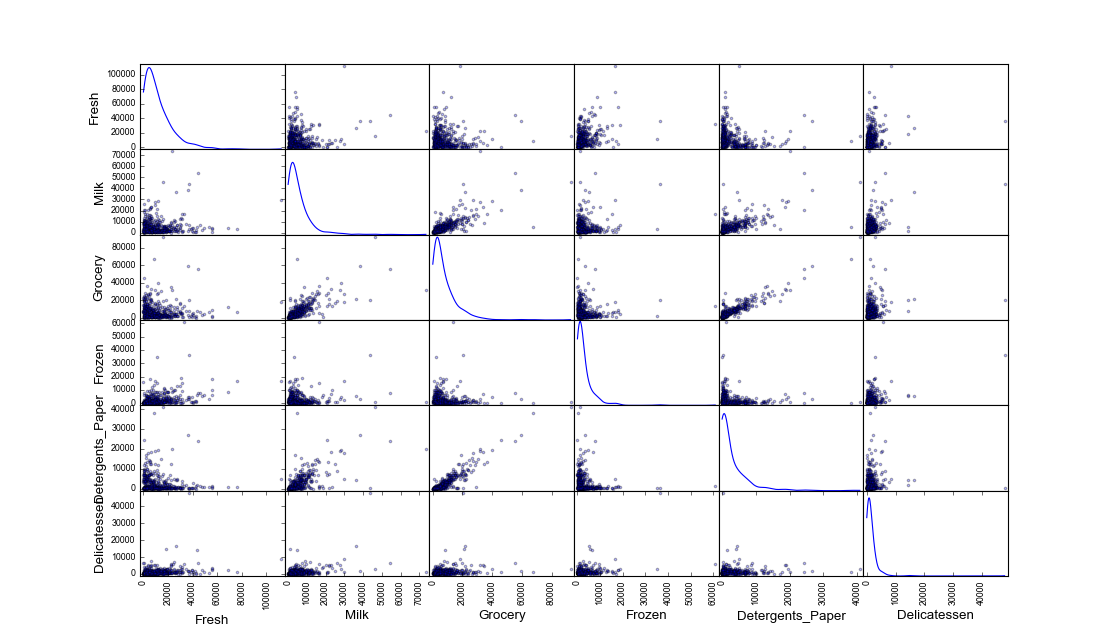

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

<IPython.core.display.Javascript object>


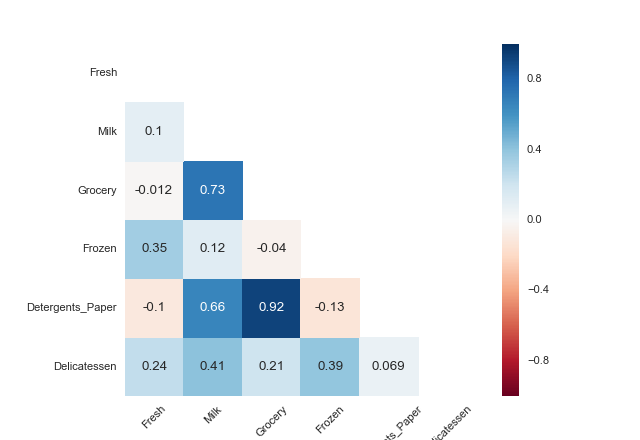

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure()
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    plt.xticks(rotation=45, ha="center");
    plt.yticks(rotation=0, ha="right");

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  From the scatter plot it is possible to identify some degree of correlation between Detergents and Grocery, Milk and Detergents and Milk and Grocery. In these graphs data show a linear positive behaviour which means a positive correlation anmong the two features. The closer the data are to the undelying line, the stronger is the correlation. This can be confirmed by looking at the correlation coefficient for each pair of variables: 0.92, 0,66 and 0.73 are the correlation values of the pairs as listed before. In all the other scatter plots data are clustered in the bottom left part of the graph and mainly lie on a horizontal line which signifies little or no correlation.

The features are not uniformly distribued: there is a very high concentration of instances on the leftmost part of each distribution. As data are here they do not seem to have an easily recognisable distribution. It seems they might be a combination of a power law with a poisson distribution. That would explain the peaks and its sharp downward slope.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

<IPython.core.display.Javascript object>


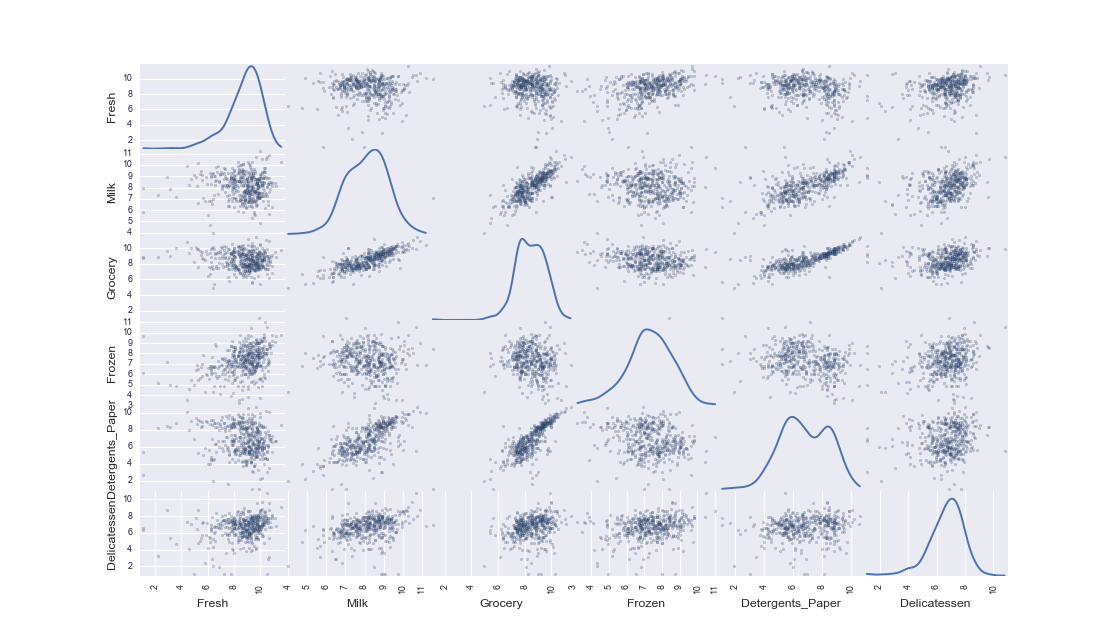

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.830971,8.752581,9.220192,7.698483,7.925519,8.064951
1,10.307452,8.380686,8.599326,7.455298,6.759255,8.439448
2,6.095825,6.778785,7.630461,5.575949,5.669881,5.556828


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
import scipy.stats
outliersList = []
all_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25, axis=0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75, axis=0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # save the outliers list to perform selected removal later
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    
    all_outliers += outliers
    
    # Substitute to the outlier value the Tukey's limit - 0.1 so that it is possible to discriminate 
    # those values that were artificially set to it and those that had it originally
    for x in outliers:    
        scipy.stats.mstats.winsorize(log_data[feature], limits=0.1)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [11]:
# Find those instances that are outliers for more than one feature
all_outliers_df = pd.DataFrame(all_outliers)
value_counts = all_outliers_df[0].value_counts()
multiple_outliers = value_counts[value_counts > 1].index

print "These elements are outliers for more than one feature: ", multiple_outliers.values

These elements are outliers for more than one feature:  [154  66  75 128  65]


In [12]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = multiple_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Outliers can either be a product of errors then they don't carry any information or a case of the process we want to model of which we don't have many recordings. In both cases they are data points that cannot be properly described and add noise to the model, thus can be eliminated. However, in a situation where there are few data and features are relatively numerous, dropping an entire row because of a outlier in only one of the features could not be worth it.

In this specific case the outliers detected with Tukey's method were 48. It seemed too drastic to drop all of these instances as it would mean to lose 12% of the data. I decided to apply the winsor method to the data and substitute the outlier values with the nearest acceptable value.  I set the outliers to be those values that are below the 5th and above the 95th percentile. Those values that were included in these conditions where set to be equal to the 5th and 95th percentile respectively. By doing so I am not forced to drop the good information included in those rows that had a outlier in one of the features. 

However points [154  66  75 128  65] are outliers to two or more features. Points that are found outliers in more than one feature have an high impact on the trained model because they force the it to adapt to their presence in more than one dimension reducing its generalization power. In this case rows with multiple artificaial values have a reduced information power and as such can be eliminated. 

Source:
https://en.wikipedia.org/wiki/Winsorizing

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

<IPython.core.display.Javascript object>


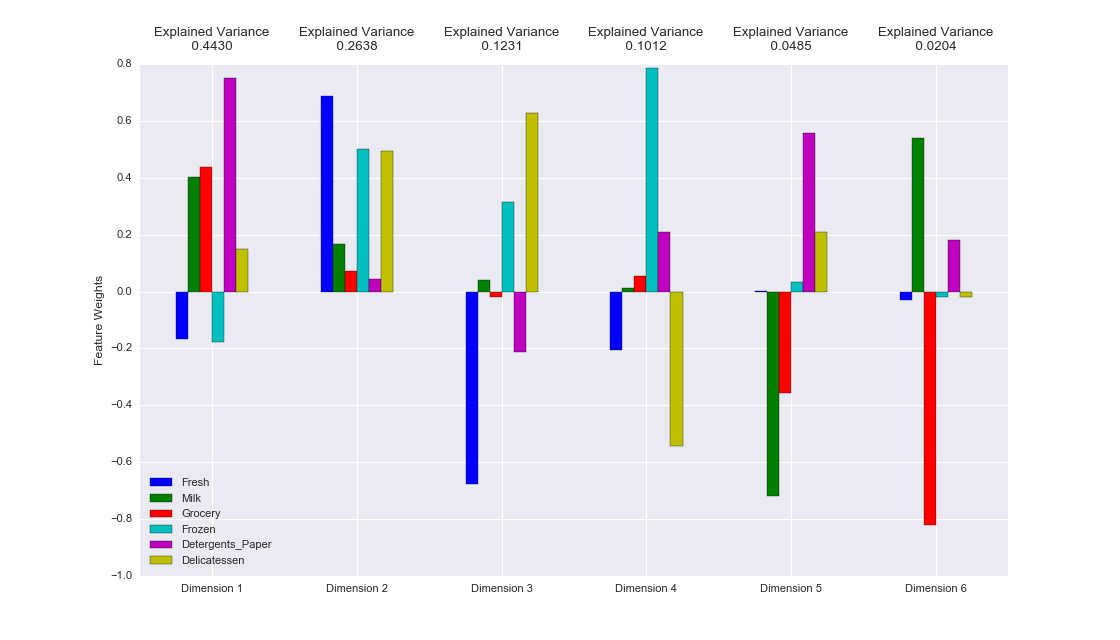

In [13]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** First and second components explain circa the 73% of the variance of the data while the first four explain the 93%.

In PCA each principal component is a linear combination of the original features. The weights drawn on the graphs represent the correlation of each original feature with the principal component. 

The first PC has a strong correlation with 'Detergents_Paper' which means that when this feature increases the PC increases almost likewise. 'Milk' and 'Grocery' are also correlated with the first component, although at a lower rate than 'Detergents_Paper'. The fact that these three features are all correlated to the first component means that they vary together to some extent, which is consistent with what was observed in Question 3. From this can be inferred that costumers that buy a lot of detergents (strongest correlated variable) tend also to buy more milk and groceries.

The second component is complementar to the first one as those features that didn't show in the first component are here strongly positively correlated to each other and the PC. In this case costumers that buy a lot of fresh products also buy more frozen and delicatessen products.

Component three shows a positive correlation for fresh products and a negative one for delis. There is also a mild positive correlation with detergents and a mild negative one with frozen products. This represent a subsets of clients for which an increase in the fresh products spending concur with a similar decrease of deli purchases as well as a small increase in detergents and a small decrease in frozen products. 

Likewise the fourth component represent a subset of customers for which an increase in spending in frozen products means a mild increase in detergents plus a strong and mild decrease in delicatessen and in fresh products. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.3906,1.8004,0.0301,-0.3807,0.2116,-0.1467
1,0.1126,2.0350,0.1102,-1.1559,0.1203,-0.0672
2,-1.1654,-3.6017,0.7443,-0.5111,0.3326,-0.1179


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.fit_transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.3906,1.8004
1,0.1126,2.0350
2,-1.1654,-3.6017


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** Kmeans is probably the simplest algorithm for unsupervised clustering and for large datasets with small K it is usually faster than other clustering techniques. It simply requires the user to insert the number of clusters K that he/she wants to divide the data into. Kmeans is guaranteed to converge although it might be subject to local minima and split the data in weird ways. This algorithm works very well with globular data. Its main disadvantage is that the final result heavily depends on the starting cluster points which are generally placed randomly.

Sources:
Course material
http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html

Gaussian Mixture Model is a soft clustering algorithm that assume that data are generated by a combination of different gaussian distributions each of which represent a cluster. Under this assumption it is then possible to find the Gaussians that generated each cluster thanks to an iterative process called Expectation-Maximization. For each point the algorithm will generate a probability that it belongs to a cluster: this does not force the algorithm to choose a cluster for those points in between two or more. This algorithm works remarkably well when data in each clusters are tight around a center. The advantage of GMM is that this model has more bias than kmeans and as such there is a lower risk for weird results to be generated. Also since for each data point it returns the probability that it was generated by all the defined clusters it gives more freedom to interpretation. However due to computational reasons GMM can fail to work if the dimensionality of the problem is greater than 6 dimensions. 

Sources:
Course material
https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model
http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier
http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html


For this case and with this knowledge I feel there is not enough information that could point to a clearly more convenient method. For this reason I am going to plot pca transformed data in order to see how they are distributed: if there are circular clusters I will use GMM otherwise I will implement Kmeans. 

<IPython.core.display.Javascript object>


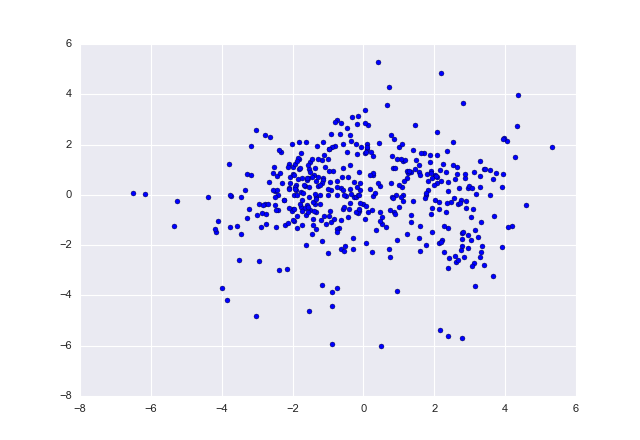

In [17]:
x_min, x_max = reduced_data["Dimension 1"].min() - 1, reduced_data["Dimension 2"].max() + 1
y_min, y_max = 0, 0

# create the mesh to plot 
xx, yy =np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

from matplotlib import pyplot as plt

plt.figure()
plt.scatter(reduced_data["Dimension 1"], reduced_data["Dimension 2"])
plt.show()

From this plot it doesn't appear to be any clear distribution of the data, thus I will use kmeans.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)

clusterer = kmeans.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = kmeans.predict(reduced_data)

# TODO: Find the cluster centers
centers = kmeans.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = kmeans.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_data, preds)
print "The silhouette score is: ", score

The silhouette score is:  0.426281015469


###### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 

|N clusters |Silhouette score|
|---|---|
|2 |0.426281015469 |
|3 |0.396777950935 |
|4 |0.331962806459 |
|5 |0.350495772584 |
|7 |0.363971603924 |
|10 |0.350653328732 |
|15 |0.357256072727 |
|20 |0.339048267398 |
|200 |0.522648832354 |

From the table above the number of clusters with the highest silhouette score is 200, however this result is clearly due to overfitting: 200 is roughly half of the overall datapoint and the clusters are small which results in a high silhouette score as the majority of the points are focused in the center.

The second highest silhouette score and the one I choose to use is with two clusters. After this point the silhouette value decreases till a local maxima and then decreases again. Also by plotting the scatter matrix of the two principal components can be seen that the first one is a bimodal distribution and as such suggests the presence of two underlying distributions. 

<IPython.core.display.Javascript object>


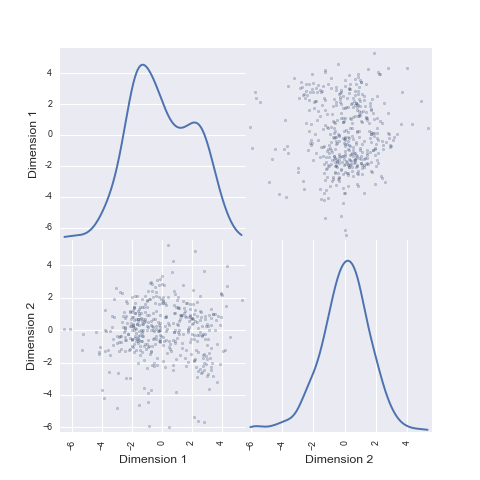

In [19]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

<IPython.core.display.Javascript object>


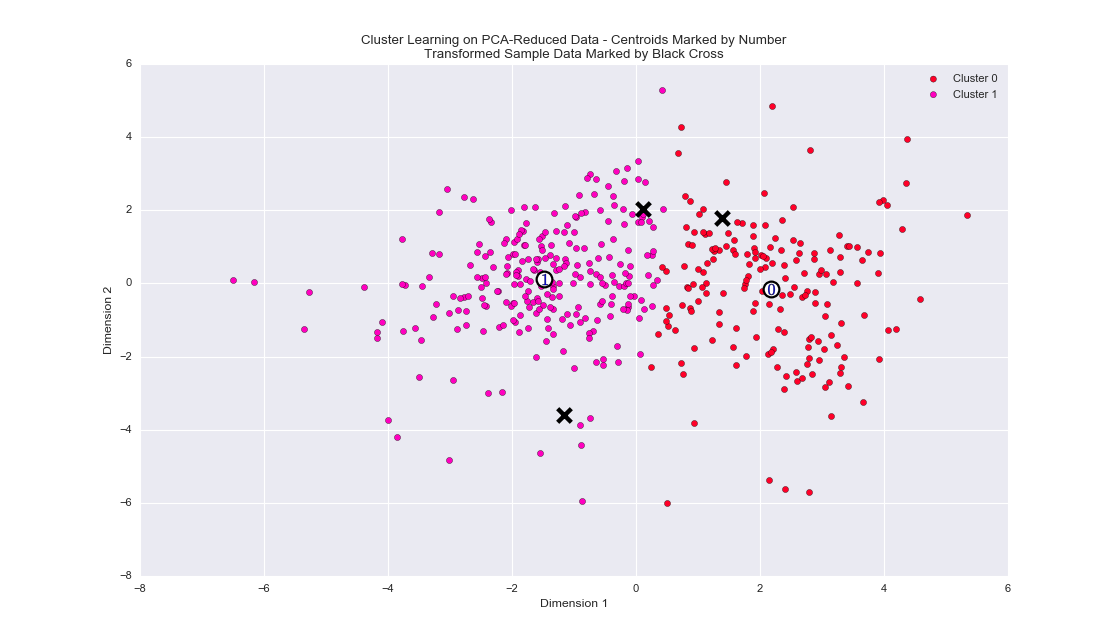

In [28]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005,7900,12104,952,4561,1036
Segment 1,8867,1897,2477,2088,294,681


In [22]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   28.7  79.0     79.9    35.1              79.2          52.9
Segment 1   52.3  30.5     30.5    58.7              28.3          37.6


<IPython.core.display.Javascript object>


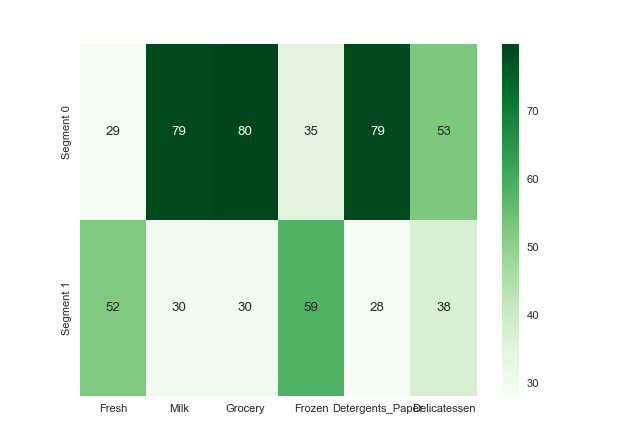

In [23]:
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print ctr_pcts

plt.figure()
# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Greens')

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 
Segment 0 center doesn't describe an enstablishment that buys much as only Fresh and Frozen products are above the 50th percentile. Probably these costumers make their profit by providing services different from selling a wide range of products. Since the two features with the highest values are both food related I am going to assume that these are small restaurants or fast foods.

Segment 1 most likely represent grocery stores as its center has many features that belong to the fourth quartile. This likely indicates an enstablishment that make profit by selling a wide variety of goods.

<IPython.core.display.Javascript object>


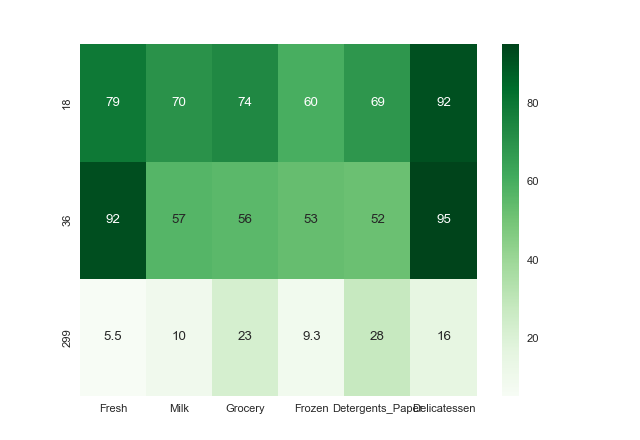

In [24]:
pct_samples = 100. * data.rank(axis = 0, pct = True).iloc[indices].round(decimals = 3)
plt.figure()
_ = sns.heatmap(pct_samples, annot = True, cmap = 'Greens')

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** The first sample belongs to  the first cluster while the other two belong to the second one. 

My original prediction was that the first and the third sample belonged to the category of stores (large the first, small the second) while the second one was a restaurant. The actual prediction however groups the second and third point in the same cluster. Moreover, according to my interpretation of the centers of the clusters, the first point would refer to a grocery store while the other two would be restaurants. By confronting the percentile distribution of each sample point with that of the cluster centers (above) it can be seen that the first point is the only one with strongly high values in Milk, Grocery and Detergents. The second point has very similar values but is weaker than the first one in the three features that most characterize segment 1. The third pont has only two features (Grocery and Detergents) that belong to the second quartile while all the others are below. This is clearly more similar to the distribution in segment 0. 

I feel that my mistake in classifying the second point wasn't too big as the first and second samples have a lot of similarities. In fact, as can be seen from the figure above they are basically placed one in front of the other. It can be that they have been misclassified or, more likely, that my initial assumptions on the spending patterns for the different categories were wrong.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**  Thanks to this model a distributor could divide each cluster into two subsets: one that receives the new delivery system and one that does not. In this way it would be possible to observe how the new system compares with the old one for each category. The retailer could formulate a null (no impact) and alternative (positive impact) hypothesis for each group and then statistically determine if the which one is correct.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** The client could take those features with the most variance (maybe those that contribue to the first principal component) and further analyze them. For example: Detergent_papers is the feature that contributes the most to the first PC so it might be interesting to see if some products sell more than others. In this way the client could extract more information from those features that influence the delivery process the most and avoid those that carry little information. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

<IPython.core.display.Javascript object>


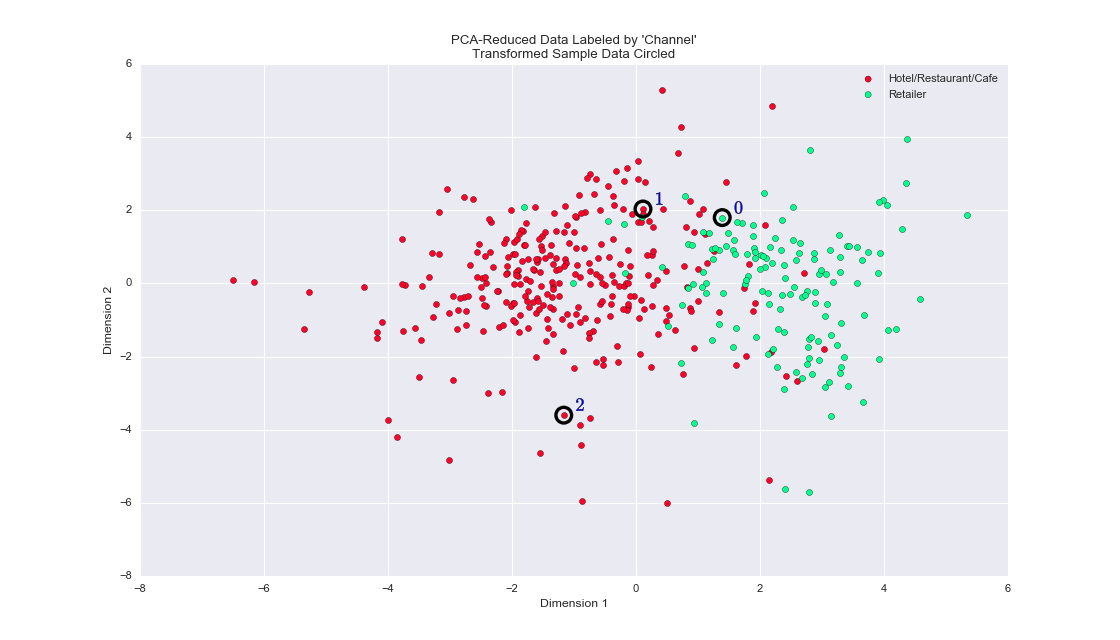

In [26]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** This distribution is very similar and consistent to the one with the one predicted by my model: the number of clusters is the same and the distribution of the two classes is very similar. As previously discussed the initial assumptions on how the first two samples had to be classified were wrong on my side. My model correctly predicted that the second and third element belonged to the same cluster. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.